In [1]:
# Import libraries and read dataset
import pandas as pd

dataset_path = 'opsd_germany_daily.csv'

opsd_daily = pd.read_csv(dataset_path)

print(opsd_daily.shape)
print(opsd_daily.dtypes)
opsd_daily.head()

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [2]:
opsd_daily = opsd_daily.set_index('Date')

opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
opsd_daily = pd.read_csv(dataset_path, index_col = 0, parse_dates = True)

opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

opsd_daily.sample(5, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [4]:
# Time-based Indexing
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [5]:
opsd_daily.loc['2012-02'].head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


<Axes: xlabel='Date'>

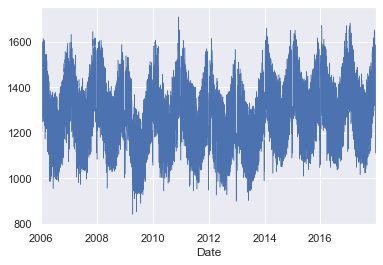

In [6]:
# Visualizing time series data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(11, 4)})
opsd_daily['Consumption'].plot(linewidth = 0.5)

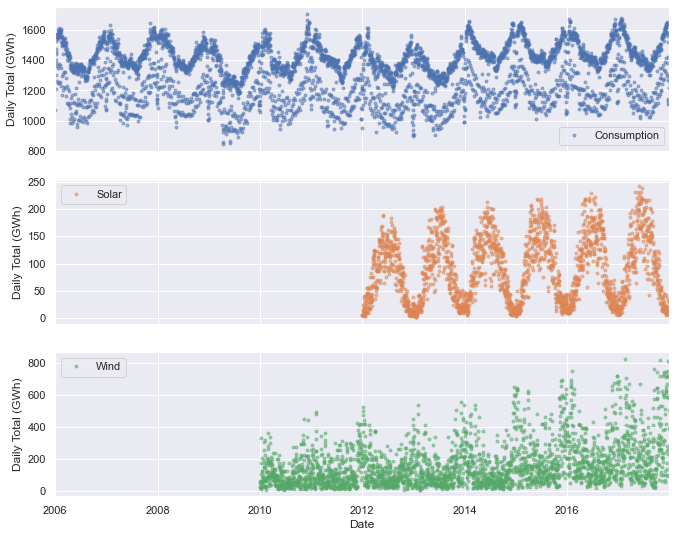

In [7]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = opsd_daily[cols_plot].plot(marker = '.', alpha = 0.5, linestyle = 'None', 
                                  figsize = (11, 9), subplots = True)

for ax in axes:
    ax.set_ylabel('Daily Total (GWh)')

plt.show()

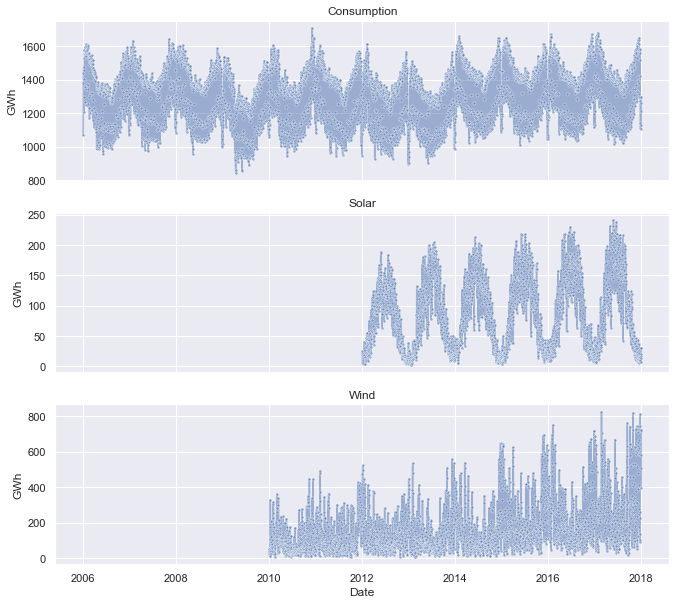

In [8]:
# Seasonality
fig, axes = plt.subplots(3, 1, figsize = (11, 10), sharex = True)

for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.lineplot(data = opsd_daily, x = opsd_daily.index, y = name, ax=ax, marker='.', alpha=0.5)
    ax.set_ylabel('GWh')
    ax.set_title(name)

    if ax != axes[-1]:
        ax.set_xlabel('')

plt.show()

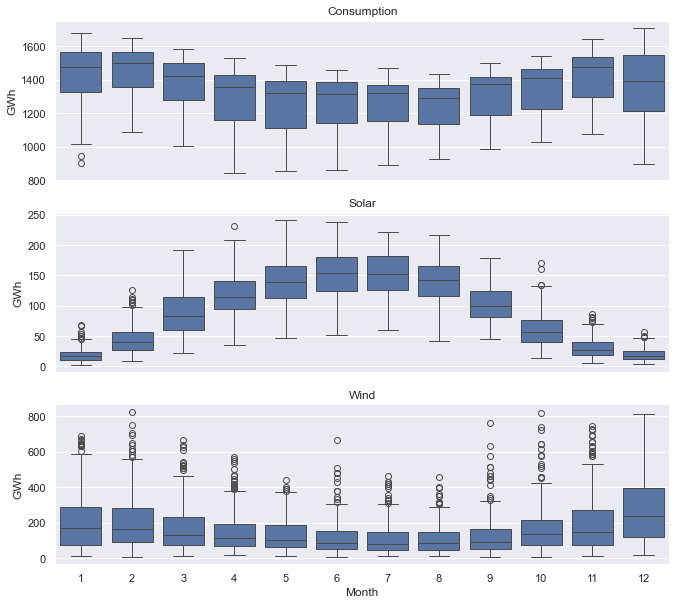

In [9]:
# Seasonality
fig, axes = plt.subplots(3, 1, figsize = (11, 10), sharex = True)

for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data = opsd_daily, x = 'Month', y = name, ax = ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

    if ax != axes[-1]:
        ax.set_xlabel('')

plt.show()

In [10]:
# Frequencies
pd.date_range('1998-03-10', '1998-03-15', freq = 'D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [11]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()

consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [12]:
consum_freq = consum_sample.asfreq('D')

consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method = 'ffill')

consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [13]:
# Resampling
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [14]:
opsd_weekly_mean.index = pd.to_datetime(opsd_weekly_mean.index)

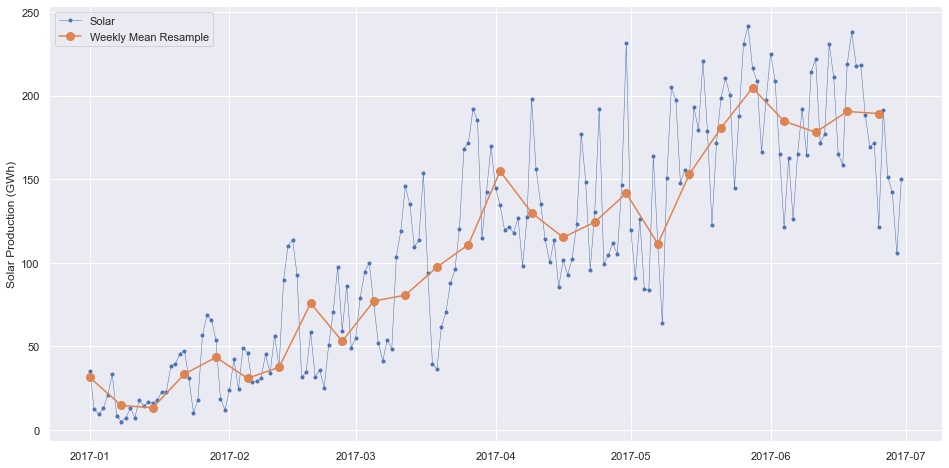

In [15]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker = '.', linestyle = '-', linewidth = 0.5, label = 'Solar')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker = 'o', markersize = 8, linestyle = '-', label = 'Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

In [16]:
opsd_annual = opsd_daily[data_columns].resample('YE').sum(min_count = 360)

opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

opsd_annual['Wind + Solar / Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual

,Consumption,Wind,Solar,Wind+Solar,Wind + Solar / Consumption
Year,,,,,
2006,489068.53600,NaN,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999,0.157057
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364


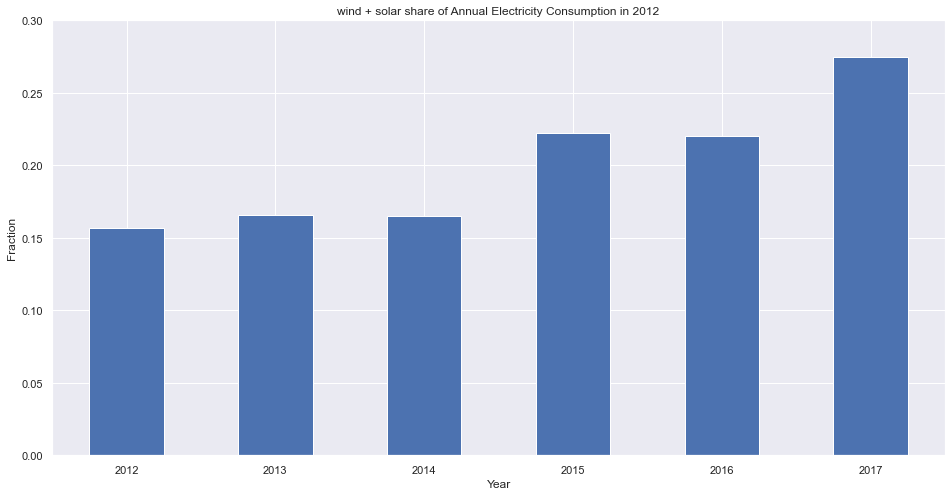

In [17]:
plt.figure(figsize = (16, 8))

ax = opsd_annual.loc[2012:, 'Wind + Solar / Consumption'].plot.bar()

ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('wind + solar share of Annual Electricity Consumption in 2012')
plt.xticks(rotation = 0)
plt.show()

In [22]:
# Rolling windows
opsd_7d = opsd_daily[data_columns].rolling(7, center = True).mean()

opsd_7d.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN


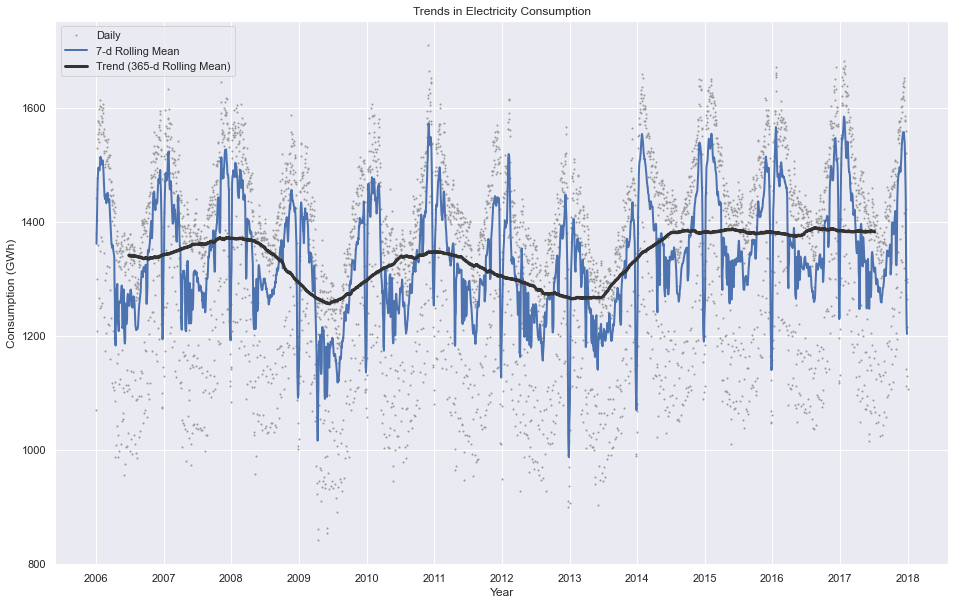

In [27]:
# Trends
import matplotlib.dates as mdates

opsd_365d = opsd_daily[data_columns].rolling(365, center = True, min_periods = 360).mean()

fig, ax = plt.subplots(figsize = (16, 10))
ax.plot(opsd_daily['Consumption'], marker = '.', markersize = 2, color = '0.6', linestyle = 'None', label = 'Daily')
ax.plot(opsd_7d['Consumption'], linewidth = 2, label = '7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color = '0.2', linewidth = 3, label = 'Trend (365-d Rolling Mean)')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

plt.show()

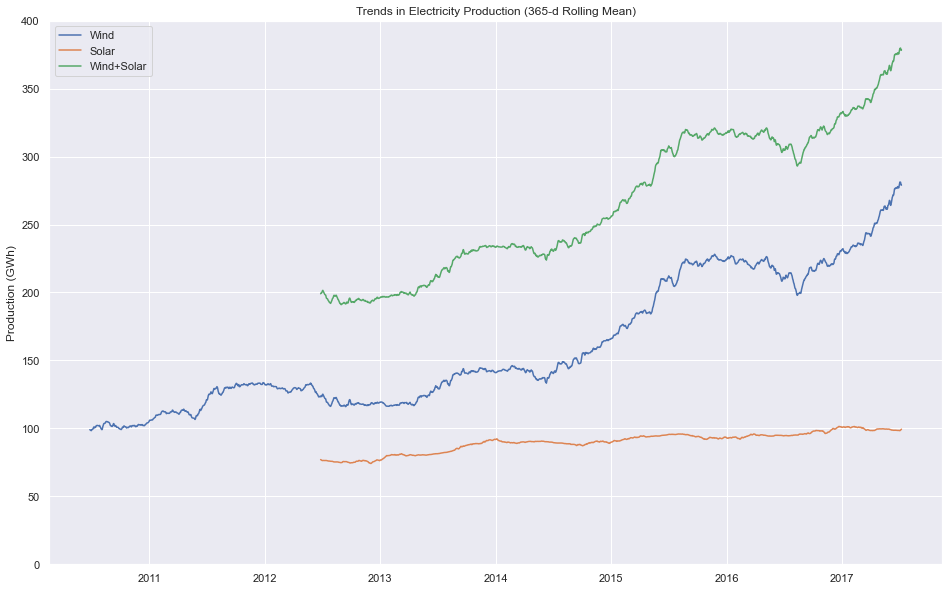

In [28]:
fig, ax = plt.subplots(figsize = (16, 10))

for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label = nm)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Mean)')

plt.show()